In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


# 선형회귀 구현하기
## 선형회귀란?
독립변수 $x_i$, 상수항 $b$와 종속변수 $y_i$ 사이의 관계를 모델화 하는 것

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# x 변수, y 변수 선언하기
x = np.linspace(0, 50, 50)
y = x + np.random.normal(0, 1, 50)

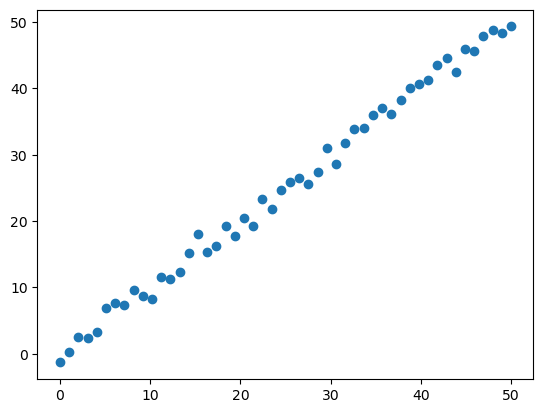

In [4]:
plt.scatter(x, y)

In [5]:
# parameters 정의하기
epochs = 10
learning_rate = 0.001

너무 작은 learning rate를 설정하면 오히려 학습되지 않을 수 있으니 주의

In [6]:
# Variables 정의하기
W = tf.Variable(0.)
b = tf.Variable(0.)

In [7]:
# 선형함수 정의하기
def linear_regression(x):
    y = W * x + b
    return y

In [8]:
# 손실함수 정의하기
def MSE(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [10]:
# 함수 훈련하기
for epoch in range(epochs):

    with tf.GradientTape() as tape:
        y_pred = linear_regression(x)
        cost = MSE(y_pred, y)

    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(W_grad * learning_rate)
    b.assign_sub(b_grad * learning_rate)

    print(f"[Epoch {epoch+1}] loss value: {cost.numpy()}")

[Epoch 1] loss value: 400.7102355957031
[Epoch 2] loss value: 188.84747314453125
[Epoch 3] loss value: 89.39010620117188
[Epoch 4] loss value: 42.70060729980469
[Epoch 5] loss value: 20.782546997070312
[Epoch 6] loss value: 10.493268013000488
[Epoch 7] loss value: 5.663022994995117
[Epoch 8] loss value: 3.3954873085021973
[Epoch 9] loss value: 2.3309988975524902
[Epoch 10] loss value: 1.831264853477478


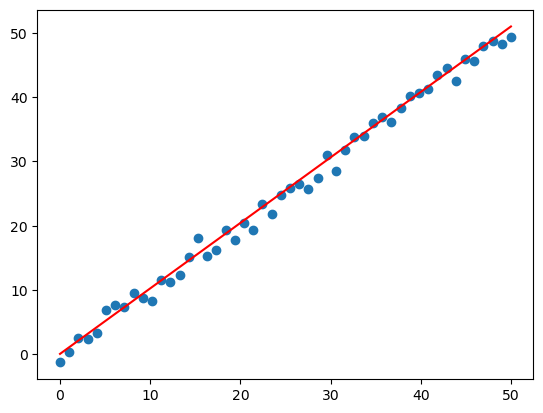

In [11]:
# 훈련된 함수 확인하기
plt.scatter(x,y)
plt.plot(x, linear_regression(x), "r")
plt.show()

# TensorFlow with keras

In [2]:
import tensorflow as tf
import numpy as np

In [25]:
# x변수, y변수 선언하기
x_train = [1, 2, 3]
y_train = list(x_train + np.random.normal(0,1,3))

In [3]:
# library를 활용하여 Optimizer 정의하기
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

In [5]:
# 모델 정의하기
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation="linear"))
model.compile(loss="mse", optimizer=sgd)

In [26]:
# 모델 훈련하기
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 85ms/step - loss: 1.5189
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 1.2532
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 1.0430
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 0.8767
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 0.7450


In [27]:
# 모델 적용하기
print(model.predict(np.array([5, 1, 3, 10])))

1/1 [==============================] - 0s 13ms/step
[[4.931569 ]
 [1.09331  ]
 [3.0124397]
 [9.729393 ]]


# Perceptron

In [28]:
# AND 게이트
def AND_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [29]:
def AND_np(x1, x2):
    x + np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [30]:
# NAND 게이트
def NAND_gate(x1, x2):
    w1, w2, theta = -0.5, -0.5, -0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [33]:
def NAND_np(x1, x2):
    x= np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [37]:
# OR 게이트
def OR_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [36]:
def OR_np(x1, x2):
    x =np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# 활성화 함수 (Activation functino)

softmax function : 분류

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Step Function
def step_function(x):
    return np.array(x > 0, dtype=np.int)

C:\Users\pg627\AppData\Local\Temp\ipykernel_13384\497464404.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


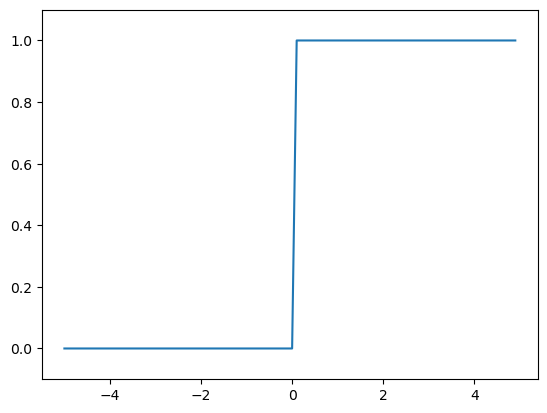

In [41]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt. ylim(-0.1, 1.1)
plt.show()


In [42]:
# Sigmoid Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

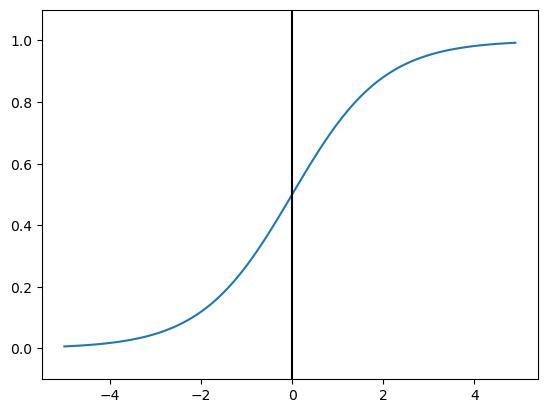

In [43]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.vlines(x=0, ymin=-0.1, ymax=1.1, color="black")
plt.show()

In [44]:
def ReLU(x):
    return np.maximum(0, x)

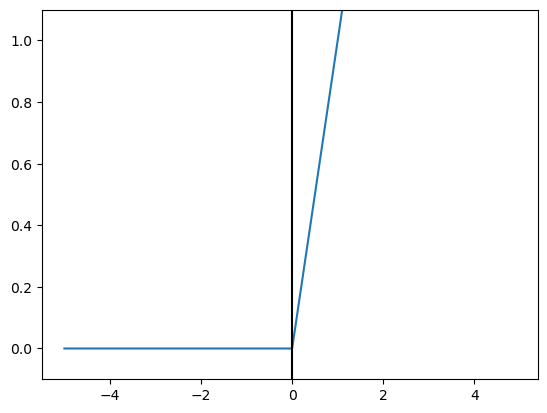

In [47]:
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.vlines(x=0, ymin=-0.1, ymax=1.1, color="black")
plt.show()

# Perceptron with Iris

In [48]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_iris
from sklearn.base import BaseEstimator, ClassifierMixin

In [49]:
# 데이터 로드와 Train&Test 분리
iris_data = load_iris()

iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))
iris_dataset = list(iris_dataset)
# random seed 설정
random.shuffle(iris_dataset)

In [57]:
def seperate_dataset():
    part_A_train = iris_dataset[0:40]
    part_A_test = iris_dataset[40:50]
    part_B_train = iris_dataset[50:90]
    part_B_test = iris_dataset[90:100]
    part_C_train = iris_dataset[100:140]
    part_C_test = iris_dataset[140:150]
    train = np.concatenate((part_A_train, part_B_train, part_C_train))
    test = np.concatenate((part_A_test, part_B_test, part_C_test))

    return train, test

In [58]:
train, test = seperate_dataset()

In [60]:
x_train = np.array(([i[:4] for i in train]))
y_train = np.array(([i[4] for i in train]))
x_test = np.array(([i[:4] for i in test]))
y_test = np.array(([i[4] for i in test]))

In [77]:
# 모델 만들기
class MLP(BaseEstimator, ClassifierMixin):

    def __init__(self):
        self.input_layer = 4
        self.hidden_layer = 5 #
        self.output_layer = 3
        self.learning_rate = 0.001 #
        self.max_epochs = 100 #
        # 잔차 b
        self.bias_hidden_value = -1
        self.bias_output_value = -1

        self.w_hidden = [[2 * random.random() -1 for i in range(self.hidden_layer)] for j in range(self.input_layer)]
        self.w_output = [[2 * random.random() -1 for i in range(self.output_layer)] for j in range(self.hidden_layer)]

        self.bias_hidden = np.array([self.bias_hidden_value for i in range(self.hidden_layer)])
        self.bias_output = np.array([self.bias_output_value for i in range(self.output_layer)])

        self.n_class = 3
    
    
    def activation_func(self, x):
        # sigmoid
        return 1 / (1 + np.exp(-x))
    

    def derivation_func(self,x):
        #sigmoid
        return x * (1 - x)
    

    def backpropagation(self,x):
        D_output=[]
        erro_output = self.output - self.output_l2
        D_output = -1 * erro_output * self.derivation_func(self.output_l2)

        for i in range(self.hidden_layer):
            for j in range(self.output_layer):
                self.w_output[i][j] -= self.learning_rate * (D_output[j] * self.output_l1[i])
                self.bias_output[j] -= self.learning_rate * D_output[j]

        D_hidden = np.matmul(self.w_output, D_output) * self.derivation_func(self.output_l1)

        for i in range(self.output_layer):
            for j in range(self.hidden_layer):
                self.w_hidden[i][j] -= self.learning_rate * (D_hidden[j] * x[i])
                self.bias_hidden[j] -= self.learning_rate * D_hidden[j]


    def fit(self, x, y):
        total_error = 0
        n = len(x)

        for epoch in range(self.max_epochs):
            for (idx, inputs) in enumerate(x):
                self.output = np.zeros(self.n_class)
                self.output_l1 = self.activation_func(np.dot(inputs, self.w_hidden) + self.bias_hidden.T)
                self.output_l2 = self.activation_func(np.dot(self.output_l1, self.w_output) + self.bias_output.T)
                if y[idx] == 0:
                    self.output = np.array([1,0,0])
                elif y[idx] == 1:
                    self.output = np.array([0,1,0])
                elif y[idx] == 2:
                    self.output = np.array([0,0,1])

                square_error = 0
                for i in range(self.output_layer):
                    erro = (self.output[i] - self.output_l2[i]) ** 2
                    square_error = square_error + 0.05 * erro
                    total_error = total_error + square_error
                self.backpropagation(inputs)

            total_error = total_error / n
            print(f"[Epoch {epoch+1}] Total_error : {total_error}")
    

    def predict(self, x, y):
        forecasts = []
        forward = self.activation_func(np.matmul(x, self.w_hidden) + self.bias_hidden)
        forward = np.matmul(forward, self.w_output) + self.bias_output

        for i in forward:
            forecasts.append(max(enumerate(i), key=lambda x : x[1])[0])

        array_score = []
        for i in range(len(forecasts)):
            if forecasts[i] == 0:
                array_score.append([i, "Iris-setosa", forecasts[i], y[i]])
            elif forecasts[i] == 1:
                array_score.append([i, "Iris-versicolour", forecasts[i], y[i]])
            elif forecasts[i] == 2:
                array_score.append([i, "Iris-virginica", forecasts[i], y[i]])
        dataframe = pd.DataFrame(array_score, columns=['id', 'class', 'model', 'target'])

        return forecasts, dataframe

In [78]:
mlp = MLP()
mlp.fit(x_train, y_train)

[Epoch 1] Total_error : 0.06561917540902282
[Epoch 2] Total_error : 0.0656915636251036
[Epoch 3] Total_error : 0.06559355102682501
[Epoch 4] Total_error : 0.06549393870532672
[Epoch 5] Total_error : 0.06539410578452914
[Epoch 6] Total_error : 0.06529403928832286
[Epoch 7] Total_error : 0.06519371791331294
[Epoch 8] Total_error : 0.06509312372956214
[Epoch 9] Total_error : 0.064992242421179
[Epoch 10] Total_error : 0.06489106340005842
[Epoch 11] Total_error : 0.06478957988211774
[Epoch 12] Total_error : 0.06468778892188441
[Epoch 13] Total_error : 0.06458569140092654
[Epoch 14] Total_error : 0.06448329196625512
[Epoch 15] Total_error : 0.06438059891571432
[Epoch 16] Total_error : 0.06427762402850833
[Epoch 17] Total_error : 0.06417438234037813
[Epoch 18] Total_error : 0.0640708918645241
[Epoch 19] Total_error : 0.06396717326112505
[Epoch 20] Total_error : 0.06386324946018415
[Epoch 21] Total_error : 0.06375914524436764
[Epoch 22] Total_error : 0.06365488680041924
[Epoch 23] Total_error 

In [79]:
forcast, df = mlp.predict(x_test, y_test)

In [81]:
df

,id,class,model,target
0,0,Iris-virginica,2,1.0
1,1,Iris-virginica,2,1.0
2,2,Iris-setosa,0,0.0
3,3,Iris-virginica,2,2.0
4,4,Iris-virginica,2,1.0
5,5,Iris-virginica,2,1.0
6,6,Iris-setosa,0,0.0
7,7,Iris-virginica,2,2.0
8,8,Iris-virginica,2,2.0
9,9,Iris-virginica,2,1.0


In [76]:
[[2 * random.random() -1 for i in range(5)] for j in range(4)]

[[0.46326923159125855,
  0.384699849229734,
  -0.1432564630627975,
  -0.9302112517730343,
  -0.09638360400143342],
 [-0.030999892488078773,
  0.580706197229826,
  -0.9752658961282272,
  0.01181002884373128,
  -0.4251222398304555],
 [-0.9298775274335682,
  -0.3394578301533657,
  -0.5695898751457011,
  -0.1983098502048637,
  0.48192519133879475],
 [-0.1716496566293324,
  -0.7383622048969873,
  0.3869565531890937,
  -0.5226055744451521,
  -0.7232610396938235]]

In [61]:
def derivation_fucn(self,x):
    #sigmoid
    return x * (1 - x)